In [8]:
import requests

In [10]:
city = "Delhi"
url="http://api.waqi.info/feed/"+ city + '/?token='
api_key="f184401417b585d32073b88e1f75ec9466d2dba7"

main_url = url+ api_key
r = requests.get(main_url) # access website or api
data = r.json()['data']
data

{'aqi': 76,
 'idx': 7024,
 'attributions': [{'url': 'https://in.usembassy.gov/embassy-consulates/new-delhi/air-quality-data/',
   'name': "U.S. Embassy and Consulates' Air Quality Monitor in India",
   'logo': 'US-StateDepartment.png'},
  {'url': 'http://worldweather.wmo.int',
   'name': 'World Meteorological Organization - surface synoptic observations (WMO-SYNOP)'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [28.63576, 77.22445],
  'name': 'New Delhi US Embassy, India (नई दिल्ली अमेरिकी दूतावास)',
  'url': 'https://aqicn.org/city/india/new-delhi/us-embassy'},
 'dominentpol': 'pm25',
 'iaqi': {'dew': {'v': 14},
  'h': {'v': 45.5},
  'p': {'v': 1007},
  'pm25': {'v': 76},
  't': {'v': 26.5},
  'w': {'v': 0.7},
  'wg': {'v': 10.2}},
 'time': {'s': '2020-05-10 20:00:00', 'tz': '+05:30', 'v': 1589140800},
 'debug': {'sync': '2020-05-11T00:04:24+09:00'}}

In [14]:
aqi = data['aqi']
iaqi =data['iaqi']


In [15]:
print(aqi)
print(iaqi)

76
{'dew': {'v': 14}, 'h': {'v': 45.5}, 'p': {'v': 1007}, 'pm25': {'v': 76}, 't': {'v': 26.5}, 'w': {'v': 0.7}, 'wg': {'v': 10.2}}


In [16]:
del iaqi['p']
print(iaqi)

{'dew': {'v': 14}, 'h': {'v': 45.5}, 'pm25': {'v': 76}, 't': {'v': 26.5}, 'w': {'v': 0.7}, 'wg': {'v': 10.2}}


In [29]:
for i in iaqi.items():
    print(i[0],':',i[1]['v'])

dew : 14
h : 45.5
pm25 : 76
t : 26.5
w : 0.7
wg : 10.2


In [30]:
dew = iaqi.get('dew')
h = iaqi.get('h')
pm25= iaqi.get('pm25')
t= iaqi.get('t')
w= iaqi.get('w')
wg= iaqi.get('wg')

In [32]:
print(dew)

{'v': 14}


In [41]:
# graph
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [ i['v'] for i in iaqi.values()]
print(pollutants)
print(values)

['dew', 'h', 'pm25', 't', 'w', 'wg']
[14, 45.5, 76, 26.5, 0.7, 10.2]


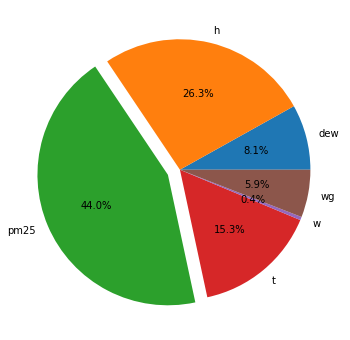

In [49]:
explode =[0 for i in pollutants]
mx = values.index(max(values))
explode[mx] = 0.1
plt.figure(figsize=(8,6))
plt.pie(values,labels=pollutants,autopct='%1.1f%%',explode=explode) # plt.pie(value, labels)
plt.show()

In [50]:
# now display the city name on map using cartopy

In [51]:
ci=data['city']['geo']

In [52]:
ci

[28.63576, 77.22445]

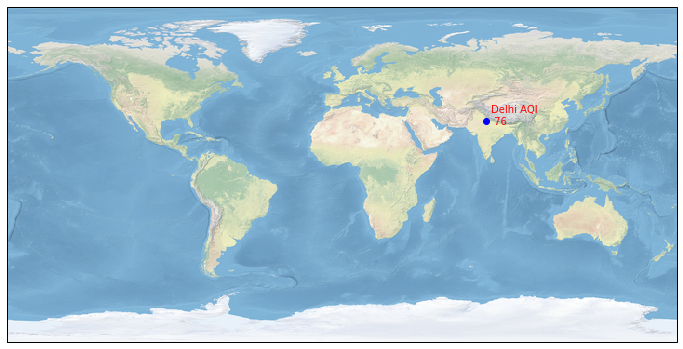

In [66]:
import cartopy.crs as ccrs
geo= data['city']['geo']
plt.figure(figsize=(12,8))
ax = plt.axes(projection =ccrs.PlateCarree())
ax.stock_img()
plt.scatter(geo[1],geo[0],color='blue')
plt.text(geo[1]+3,geo[0]-2,f'{city} AQI \n {aqi}',color='red')

plt.show()